Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/

Реализовать самостоятельно логистическую регрессию

Обучить ее методом градиентного спуска

Методом nesterov momentum

Методом rmsprop

Дополнительное задание *

В качестве dataset’а взять Iris, оставив 2 класса:

Iris Versicolor

Iris Virginica

# Библиотеки

In [201]:
import pandas as pd
import numpy as np
from scipy.misc import derivative
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from scipy import optimize as op

In [138]:
iris = datasets.load_iris(as_frame=True)
df = iris.frame

In [139]:
df = df[df['target'] != 0]

In [140]:
# Переведём в более привычный бинарный вид. Versicolour = 0, Virginica = 1
df['target'] = df['target'] - 1

<ipython-input-140-a57337295438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'] - 1


Небольшой анализ данных

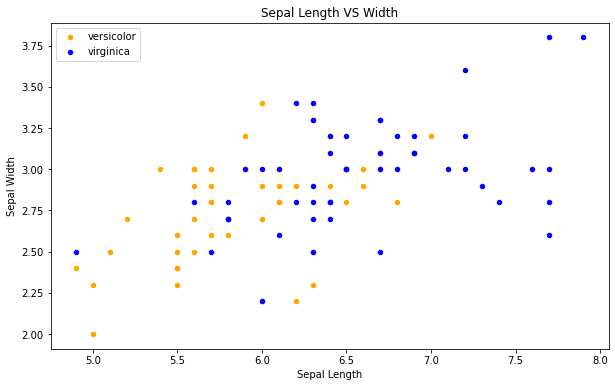

In [141]:
fig = df[df.target==0].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='orange', label='versicolor')
df[df.target==1].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='blue', label='virginica',ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

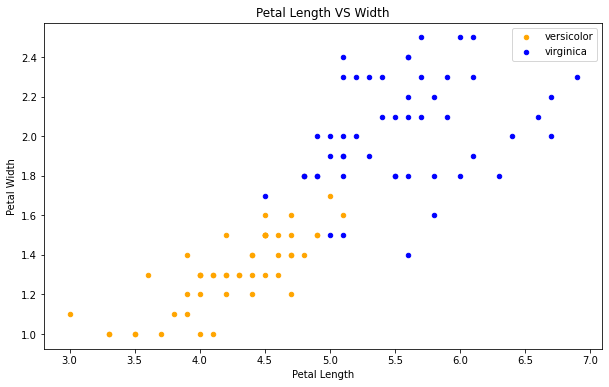

In [142]:
fig = df[df.target==0].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='orange', label='versicolor')
df[df.target==1].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='blue', label='virginica',ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [143]:
X = df.drop(columns = 'target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'X train size: {X_train.shape}')
print(f'X test size: {X_test.shape}')
print(f'y train size: {y_train.shape}')
print(f'y test size: {y_test.shape}')

X train size: (80, 4)
X test size: (20, 4)
y train size: (80,)
y test size: (20,)


# Логистическая регрессия

Sigmoid:

$\hat y = \frac{1}{1 + e^{-z}}$

In [161]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

Loss

$J=-\sum_{i=1}^{N} y_{i} \log \left(h_{\theta}\left(x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-h_{\theta}\left(x_{i}\right)\right)$

Gradient Descent

$\Delta \theta=-\eta \nabla_{\theta} J(\theta)$

$\theta=\theta+\Delta \theta=\theta-\eta \nabla_{\theta} J(\theta)$

где $\theta$ — параметры сети, $J(\theta)$ — целевая функция или функция потерь в случае машинного обучения, а $\eta$ — скорость обучения

In [215]:
# С регуляризаций
def cost_function(theta, X, y, _lambda = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)
    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

In [254]:
lr = 0.01
params = [np.array([0,0,0,0])]
n_epochs = 100

In [255]:
#TRAIN
for _ in range(n_epochs):
    theta = params[-1]
    grad = cost_function(theta, X_train.values, y_train.values)
    new_theta = theta - lr * grad
    params.append(new_theta)

<ipython-input-161-3db925c61081>:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-215-12d60cdb09a0>:6: RuntimeWarning: divide by zero encountered in log
  return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg


In [256]:
def grad(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

In [257]:
params

[array([0, 0, 0, 0]),
 array([-0.00693147, -0.00693147, -0.00693147, -0.00693147]),
 array([-0.01383141, -0.01383141, -0.01383141, -0.01383141]),
 array([-0.02072887, -0.02072887, -0.02072887, -0.02072887]),
 array([-0.02765242, -0.02765242, -0.02765242, -0.02765242]),
 array([-0.03463045, -0.03463045, -0.03463045, -0.03463045]),
 array([-0.04169148, -0.04169148, -0.04169148, -0.04169148]),
 array([-0.04886439, -0.04886439, -0.04886439, -0.04886439]),
 array([-0.05617877, -0.05617877, -0.05617877, -0.05617877]),
 array([-0.06366514, -0.06366514, -0.06366514, -0.06366514]),
 array([-0.07135522, -0.07135522, -0.07135522, -0.07135522]),
 array([-0.07928222, -0.07928222, -0.07928222, -0.07928222]),
 array([-0.08748104, -0.08748104, -0.08748104, -0.08748104]),
 array([-0.09598859, -0.09598859, -0.09598859, -0.09598859]),
 array([-0.104844, -0.104844, -0.104844, -0.104844]),
 array([-0.11408884, -0.11408884, -0.11408884, -0.11408884]),
 array([-0.12376743, -0.12376743, -0.12376743, -0.123767